In [329]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x*x*x-7*x*x+14*x-5
def df(x):
    return 3*x*x-14*x+14

In [330]:
#Newton-Raphson Method
def NR_meth(eps, function, dfunction, x0):
    
    #Initialize arrays and an error higher than input to begin updates
    error=eps+1
    err_arr = np.array([])
    x_n=np.array([x0])
    fx_n=np.array([f(x0)])
    
    #Loop while error is greater than a desired precision
    while error>eps:

        #Find next iteration
        x_n1 = x_n[-1] - function(x_n[-1]) / dfunction(x_n[-1])

        #Update arrays and error
        x_n = np.append(x_n, x_n1)
        fx_n = np.append(fx_n, f(x_n1))

        error = np.abs(x_n[-1]-x_n[-2])
        err_arr = np.append(err_arr, error)

    return x_n, err_arr

In [331]:
x_NR, err_NR = NR_meth(1e-8, f, df, 0)
len(x_NR)

6

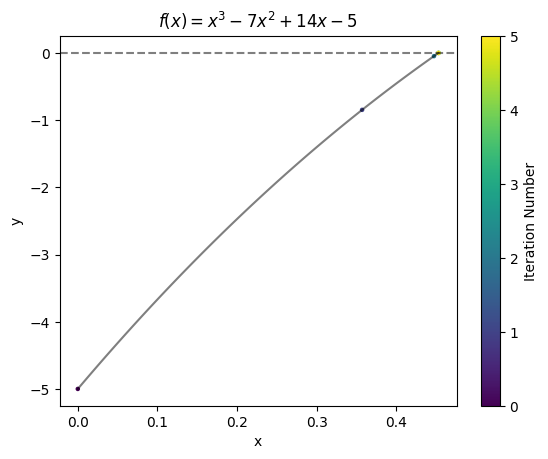

In [332]:
x_NR_grid = np.linspace(np.min(x_NR) ,np.max(x_NR), 100)
y_NR_cubic = f(x_NR_grid)

plt.plot(x_NR_grid, y_NR_cubic, c='black', alpha=0.5)
plt.axhline(0, linestyle='--', c='black', alpha=0.5)

plt.scatter(x_NR, f(x_NR), c=np.arange(len(x_NR)), cmap='viridis', s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$f(x) = x^3-7x^2+14x-5$')
plt.colorbar(label='Iteration Number')
plt.savefig('NR_method_plot')

In [333]:
#Bisection Method
def bi_meth(eps, function, x0, x1):
    
    #Initialize arrays and an error higher than input to begin updates
    error = eps+1
    err_arr = np.array([])
    x_n = np.array([x0,x1])
    fx_n = np.array([function(x0),function(x1)])

    #End process with bad inputs
    if function(x0)*function(x1) > 0:

        print('Input points have the same sign')
        return

    #Define interval to update with proper direction (a<b)
    if function(x0)<function(x1):
        a=x0
        b=x1
    else:
        a=x1
        b=x0

    #Loop while error is greater than a desired precision
    while error>eps: 

        #Update arrays
        mid = (a+b)/2
        x_n = np.append(x_n, mid)
        fx_n = np.append(fx_n, function(mid))

        #Update the interval with the correct bound
        if function(mid) < 0:
            a=mid
        else:
            b=mid

        error = np.abs(b-a)
        err_arr = np.append(err_arr, error)

    return x_n, err_arr

In [334]:
x_bi, err_bi = bi_meth(10e-8,f, 0,1)
len(x_bi)

26

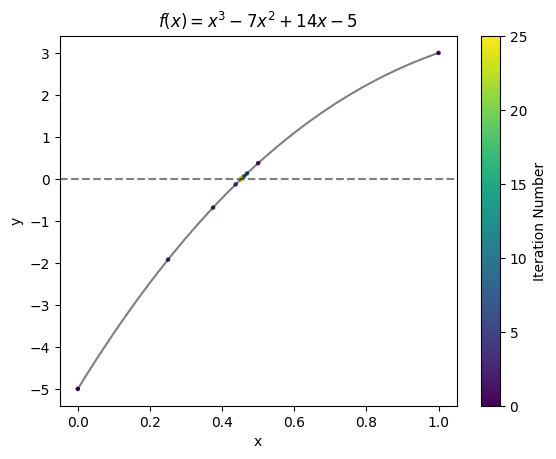

In [335]:
x_bi_grid = np.linspace(np.min(x_bi) ,np.max(x_bi), 100)
y_bi_cubic = f(x_bi_grid)

plt.plot(x_bi_grid, y_bi_cubic, c='black', alpha=0.5)
plt.axhline(0, linestyle='--', c='black', alpha=0.5)

plt.scatter(x_bi, f(x_bi), c=np.arange(len(x_bi)), cmap='viridis', s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$f(x) = x^3-7x^2+14x-5$')
plt.colorbar(label='Iteration Number')
plt.savefig('Bi_method_plot')

In [336]:
r_s = 21 #kpc
rho = 14e6 #M_sun * kpc^-3
M_halo = 1.5e12 #M_sun
def personal_func(r):
    frac = r / r_s
    f_r = 4*np.pi*rho*r_s**3 * (np.log(1+frac)-frac/(1+frac)) - 1/2 * M_halo
    return f_r

In [337]:
bi_meth(1e-8,personal_func,0,200)

(array([  0.        , 200.        , 100.        ,  50.        ,
         25.        ,  37.5       ,  43.75      ,  46.875     ,
         45.3125    ,  44.53125   ,  44.921875  ,  44.7265625 ,
         44.62890625,  44.67773438,  44.70214844,  44.71435547,
         44.70825195,  44.71130371,  44.70977783,  44.71054077,
         44.71092224,  44.71111298,  44.71101761,  44.71106529,
         44.71108913,  44.71107721,  44.71108317,  44.71108615,
         44.71108466,  44.71108392,  44.71108429,  44.71108448,
         44.71108457,  44.71108452,  44.7110845 ,  44.71108449,
         44.71108448]),
 array([1.00000000e+02, 5.00000000e+01, 2.50000000e+01, 1.25000000e+01,
        6.25000000e+00, 3.12500000e+00, 1.56250000e+00, 7.81250000e-01,
        3.90625000e-01, 1.95312500e-01, 9.76562500e-02, 4.88281250e-02,
        2.44140625e-02, 1.22070312e-02, 6.10351562e-03, 3.05175781e-03,
        1.52587891e-03, 7.62939453e-04, 3.81469727e-04, 1.90734863e-04,
        9.53674316e-05, 4.76837158e-05, 